In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# !pip install koreanize-matplotlib
import koreanize_matplotlib

%config InlineBackend.figure_format = 'retina'

In [3]:
df = pd.read_parquet("https://github.com/corazzon/KaggleStruggle/raw/master/online-retail/data/online_retail.gzip")
df.shape

(541909, 8)

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype   
---  ------       --------------   -----   
 0   InvoiceNo    541909 non-null  category
 1   StockCode    541909 non-null  category
 2   Description  540455 non-null  category
 3   Quantity     541909 non-null  int32   
 4   InvoiceDate  541909 non-null  category
 5   UnitPrice    541909 non-null  float64 
 6   CustomerID   406829 non-null  float32 
 7   Country      541909 non-null  category
dtypes: category(5), float32(1), float64(1), int32(1)
memory usage: 15.1 MB


## 미션 1) 모집단과 표본 추출을 하고 TotalPrice에 대해 비교해 주세요.
데이터셋에서 무작위로 1000개의 표본을 추출하고, 추출된 표본과 전체 데이터셋의 'TotalPrice'에 대해 평균과 표준편차를 비교하세요. \
이를 통해 모집단과 표본의 차이를 설명하고, 중심극한정리가 어떻게 적용되는지 설명하세요.

- pandas 의 sample 을 활용할 수 있으며, pandas 의 기술 통계 기능을 활용해 볼 수 있습니다.

아래의 코드를 활용하세요.

```python
# 주문 날짜 데이터 전처리
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"].astype(str))
df["InvoiceMonth"] = df["InvoiceDate"].dt.month

# 데이터 타입 변경
df["Country"] = df["Country"].astype(str)

# 주문 가격
df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]
df.head()
```

In [6]:
# 주문 날짜 데이터 전처리
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"].astype(str))
df["InvoiceMonth"] = df["InvoiceDate"].dt.month

In [7]:
# 데이터 타입 변경
df["Country"] = df["Country"].astype(str)

In [8]:
# 주문 가격
df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34


In [9]:
#평균과 표준편차를 구하는 함수
def get_mean_std(sample):
    mean = sample.mean()
    std = sample.std()

    print(f"평균: {mean}, 표준편차: {std}")

In [10]:
#모집단의 평균과 표준편차
get_mean_std(df["TotalPrice"])

평균: 17.98779487699964, 표준편차: 378.8108235059747


In [11]:
#표본추출
def simple_sample(data, sample_size):
    return data.sample(sample_size)

In [12]:
#표본집단의 평균과 표준편차
sam_df = simple_sample(df, 1000)

get_mean_std(sam_df["TotalPrice"])

평균: 19.46082, 표준편차: 53.2006876148259


In [13]:
#중심극한정리
n_iterates = 1000
sample_means = []

for _ in range(n_iterates):
    sample = simple_sample(df, 1000)
    sample_mean = sample["TotalPrice"].mean()
    sample_means.append(sample_mean)

In [14]:
np.mean(sample_means)
#중심극한정리로 표본집단의 평균이 모집단과 거의 동일해졌다.

18.233609678

<Axes: ylabel='Count'>

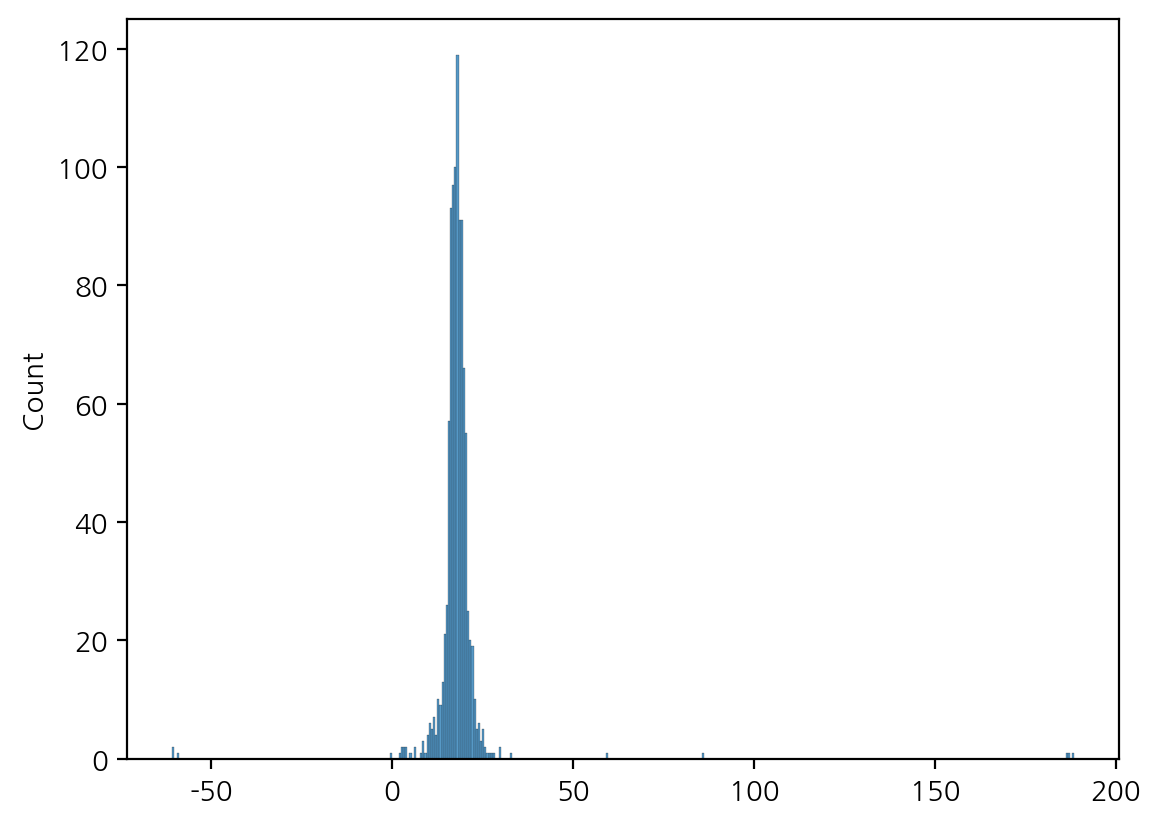

In [15]:
sns.histplot(sample_means)

## 미션2) 'Country' 변수를 바탕으로 가장 빈도가 높은 두 개의 국가를 선택하고, 각 국가의 'TotalPrice' 평균에 차이가 있는지 검증하세요. 독립표본 t-검정을 사용하여 가설을 설정하고 검정하며, 1종 오류와 2종 오류에 대해 설명하세요.


* 미션 진행 방법
    <br>1) 데이터 로드 후 'TotalPrice'와 'Country' 컬럼을 찾아주세요.
    <br>2) 데이터셋에서 주문이 가장 많은 상위 두 국가를 찾아주세요.
    <br>3) 통계적 검증 수행하기
    <br>4) 각 국가의 'TotalPrice' 평균을 계산하세요.
    <br>5) 독립표본 t-검정을 사용하여 두 국가 간 'TotalPrice' 평균의 차이가 통계적으로 유의미한지 검증하세요. 이 때, scipy.stats 라이브러리의 ttest_ind 함수를 사용할 수 있습니다. equal_var=False 파라미터를 설정하여 두 집단의 분산이 다르다고 가정하세요.
    <br>6) t-통계량과 p-값을 해석하여 결과를 설명하세요. 1종 오류와 2종 오류의 개념을 설명하고, 해당 데이터셋에 적용하여 설명해 주세요.

In [16]:
#총금액, 국가 데이터로드
df_tc = df.loc[:, ["TotalPrice", "Country"]]
df_tc.head()

,TotalPrice,Country
0,15.30,United Kingdom
1,20.34,United Kingdom
2,22.00,United Kingdom
3,20.34,United Kingdom
4,20.34,United Kingdom


In [17]:
#상위5개국 - 영국과 독일의 주문량이 가잖 많다
df_tc['Country'].value_counts(ascending=False).head()

Country
United Kingdom    495478
Germany             9495
France              8557
EIRE                8196
Spain               2533
Name: count, dtype: int64

In [18]:
#영국 총주문량의 통계
get_mean_std(df_tc[df_tc["Country"] == "United Kingdom"]["TotalPrice"])

평균: 16.525065419655366, 표준편차: 394.83911570239025


In [19]:
#독일 총주문량 통계
get_mean_std(df_tc[df_tc["Country"] == "Germany"]["TotalPrice"])

평균: 23.348942601369142, 표준편차: 37.32482568148618


In [20]:
#t검정 함수
from scipy.stats import ttest_ind

def ttest_totalprice(country1, country2):
    return ttest_ind(df_tc[df_tc["Country"] == country1]["TotalPrice"], df_tc[df_tc["Country"] == country2]["TotalPrice"], equal_var=False)

In [21]:
ttest_totalprice("United Kingdom", "Germany")

TtestResult(statistic=-10.046360185819829, pvalue=9.823416115791871e-24, df=86270.53867427883)

p값이 0.05 이상일 때 1종 오류 발생 가능성이 있다고 판단하고,
검정력이 낮을 때 2종 오류 발생 가능성이 있다고 판단한다.

t검정 결과 p값이 낮고 검정력이 높아서 두 집단 간에는 유의미한 차이가 있다고 판단할 수 있다.

## 미션 3) 주중, 주말에 따른 기술통계와 분위수 분석

'UnitPrice'의 분포를 분석하기 위해 상자수염그림과 히스토그램을 그리세요. 데이터의 분위수, 중심경향치(평균, 중간값), 변산성(표준편차, 분산)을 계산하고, 이들이 데이터 분포에 대해 설명해 주세요. \
다음의 주어진 코드를 활용해 주세요.


```python
# 'InvoiceDate' 컬럼을 이용하여 주중과 주말을 구분
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek


df.loc[df['DayOfWeek'] <= 4, "WeekEnd"] = "주중"
df.loc[df['DayOfWeek'] > 4, "WeekEnd"] = "주말"

# 주중(월요일=0, 화요일=1, ..., 금요일=4)과 주말(토요일=5, 일요일=6)으로 데이터를 분리
weekday_data = df[df['DayOfWeek'] <= 4]  # 주중
weekend_data = df[df['DayOfWeek'] > 4]   # 주말
```

In [22]:
# 'InvoiceDate' 컬럼을 이용하여 주중과 주말을 구분
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek


df.loc[df['DayOfWeek'] <= 4, "WeekEnd"] = "주중"
df.loc[df['DayOfWeek'] > 4, "WeekEnd"] = "주말"

# 주중(월요일=0, 화요일=1, ..., 금요일=4)과 주말(토요일=5, 일요일=6)으로 데이터를 분리
weekday_data = df[df['DayOfWeek'] <= 4]  # 주중
weekend_data = df[df['DayOfWeek'] > 4]   # 주말

<Axes: xlabel='WeekEnd', ylabel='UnitPrice'>

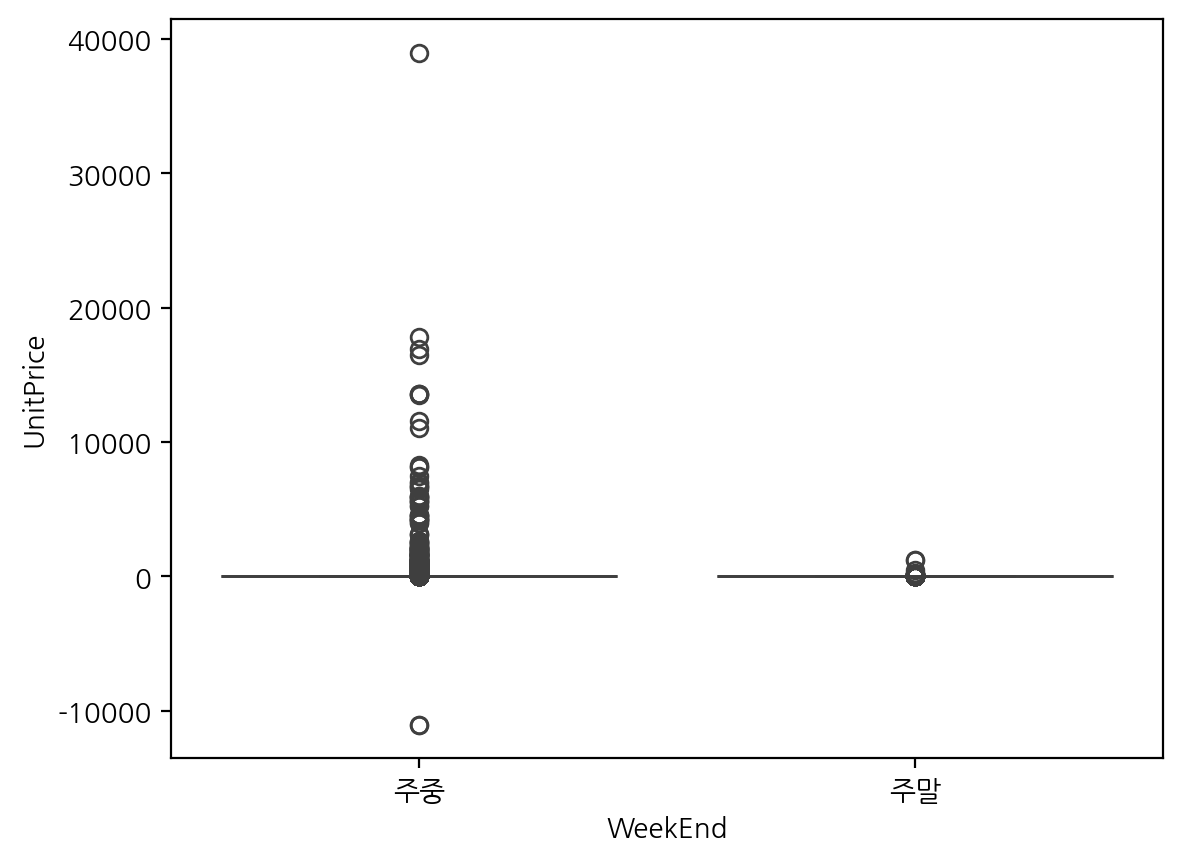

In [23]:
sns.boxplot(x="WeekEnd", y="UnitPrice", data=df)

<Axes: xlabel='WeekEnd', ylabel='UnitPrice'>

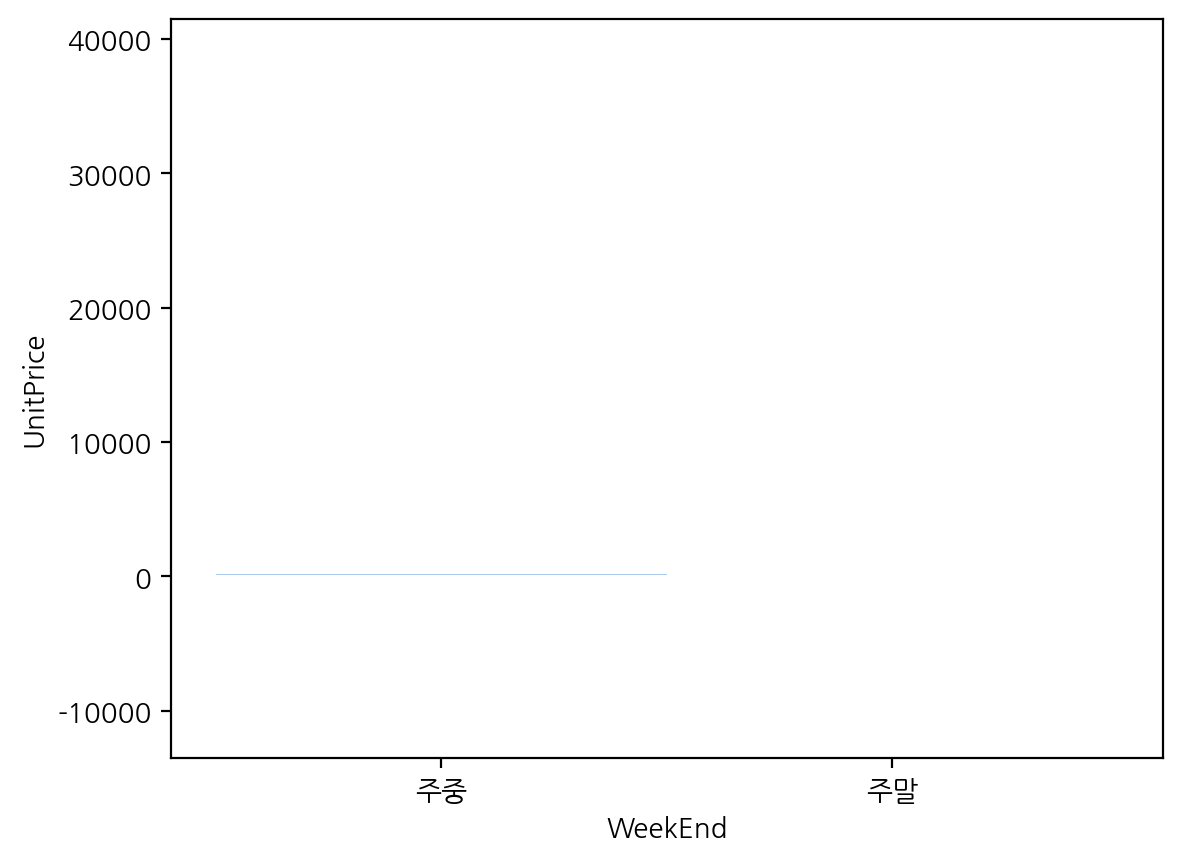

In [24]:
sns.histplot(x="WeekEnd", y="UnitPrice", data=df)

In [25]:
#데이터 추출
df_3 = df.loc[:, ["UnitPrice", "WeekEnd"]]
df_3.head()

,UnitPrice,WeekEnd
0,2.55,주중
1,3.39,주중
2,2.75,주중
3,3.39,주중
4,3.39,주중


In [26]:
df_3.groupby("WeekEnd").describe()

UnitPrice                                                            
            count      mean         std       min   25%   50%   75%       max
WeekEnd                                                                      
주말        64375.0  2.887824    7.959497      0.00  1.25  1.85  3.75   1236.75
주중       477534.0  4.843425  103.032058 -11062.06  1.25  2.10  4.13  38970.00

주말 주문은 주중보다 평균이 적고 중위수도 낮다. 하지만 변산성도 낮아 안정적으로 주문이 들어온다.


## 미션4) 심슨의 역설을 설명하기 위한 구체적인 분석을 다음의 순서로 진행해 주세요.

심슨의 역설(Simpson's Paradox)은 통계 데이터를 해석할 때 발생할 수 있는 현상으로, 일부 하위 그룹에서 관찰된 추세가 전체 데이터를 합쳤을 때 반전될 수 있음을 나타냅니다. 이 현상은 복잡한 데이터에서 하위 그룹 간에 상이한 분포나 크기 때문에 발생할 수 있습니다.

심슨의 역설을 설명하기 위해서는, 데이터 내에서 서로 상반된 추세를 보이는 하위 그룹을 찾거나 생성해야 합니다. 예를 들어, 특정 상품의 판매량이나 단가가 국가별로 다른 추세를 보이는지, 혹은 특정 기간 동안의 판매 추세가 전체 기간 동안의 추세와 다른지 등을 분석할 수 있습니다.

데이터를 제시한 특정 국가로 하위 그룹으로 나눕니다.
각 하위 그룹에서 총 판매금액의 추세를 분석합니다.
전체 데이터셋에 대해 동일한 지표를 분석합니다.
하위 그룹의 추세와 전체 데이터의 추세가 서로 다른 방향성을 보일 경우, 이를 통해 심슨의 역설을 설명합니다.
이러한 분석을 위해, 데이터 내에서 적절한 변수와 하위 그룹을 선정하는 것이 중요합니다. 현재 제공된 데이터만으로는 심슨의 역설을 바로 설명할 수 있는 명확한 예시를 찾기 어려울 수 있지만, 데이터를 깊이 분석하면 관련 현상을 발견할 수도 있습니다.
이를 이용해 비즈니스에 어떻게 활용할 수 있을지도 설명해 주세요.

```python
country_group = ["Japan", "Hong Kong", "Singapore", "Lebanon", "Canada", "USA"]
```

In [27]:
country_group = ["Japan", "Hong Kong", "Singapore", "Lebanon", "Canada", "USA"]

In [28]:
#데이터 추출
df_4 = df.loc[df["Country"].isin(country_group), ["TotalPrice", "UnitPrice", "Country"]]
df_4.head()

,TotalPrice,UnitPrice,Country
9783,15.30,2.55,Japan
9784,5.04,0.42,Japan
9785,5.04,0.42,Japan
9786,5.04,0.42,Japan
9787,5.04,0.42,Japan


In [29]:
df_4.groupby("Country").describe()

TotalPrice                                                        \
               count       mean         std      min    25%   50%      75%   
Country                                                                      
Canada         151.0  24.280662   61.117249     2.50  10.50  16.5   19.800   
Hong Kong      288.0  35.128611  312.203807 -2653.95  15.00  23.4   45.675   
Japan          358.0  98.716816  311.427891 -1591.20   5.04  61.2  120.000   
Lebanon         45.0  37.641778   29.117840    10.20  17.00  31.6   47.400   
Singapore      229.0  39.827031  527.909692 -3949.32  16.80  34.8   60.000   
USA            291.0   5.948179   21.614088   -74.88 -13.20  10.5   17.550   

                   UnitPrice                                                   \
               max     count        mean         std   min   25%    50%   75%   
Country                                                                         
Canada      550.94     151.0    6.030331   44.713675  0.10  0.83  1.650  2.95   
Hong Kong  2653.95     288.0   42.505208  307.646598  0.21  1.25  2.325  4.15   
Japan      3794.40     358.0    2.276145    3.091514  0.21  0.85  1.650  2.55   
Lebanon     153.00      45.0    5.387556    4.068741  0.55  2.55  3.950  7.95   
Singapore  3949.32     229.0  109.645808  515.275500  0.19  1.25  2.100  4.15   
USA          81.36     291.0    2.216426    2.261647  0.42  0.85  1.450  2.95   

                    
               max  
Country             
Canada      550.94  
Hong Kong  2653.95  
Japan        45.57  
Lebanon      14.95  
Singapore  3949.32  
USA          16.95

In [30]:
#시각화하기
#어떤걸 선택해야할지 모르겠다

## 미션5) 상품의 단가와 총 판매액의 관계를 분석해 주세요.

상품의 단가가 총 판매액에 미치는 영향을 이해하고 예측하는 것입니다. 이 분석은 가격 결정 전략을 개선하고, 수익성을 최대화하기 위해 사용될 수 있습니다.
높은 단가의 상품이 더 많은 총 판매액을 생성할 것이라는 가설을 설정합니다.

1) 데이터 전처리: 필요한 데이터를 정리하고, 결측치를 제거합니다.\
2) 단순 회귀분석: 단가(UnitPrice)를 독립변수로, 총 판매액(TotalPrice)을 종속변수로 설정하여 회귀분석을 수행합니다.\
3) 결과 해석: 회귀계수와 결정계수를 분석하여 상품 가격과 총 판매액 사이의 관계를 해석합니다.

In [31]:
#단가와 총판매액 추출
df_5 = df.loc[:, ["UnitPrice", "TotalPrice"]]
df_5.head()

,UnitPrice,TotalPrice
0,2.55,15.30
1,3.39,20.34
2,2.75,22.00
3,3.39,20.34
4,3.39,20.34


In [32]:
df_5.describe()

,UnitPrice,TotalPrice
count,541909.000000,541909.000000
mean,4.611114,17.987795
std,96.759853,378.810824
min,-11062.060000,-168469.600000
25%,1.250000,3.400000
50%,2.080000,9.750000
75%,4.130000,17.400000
max,38970.000000,168469.600000


<Axes: xlabel='UnitPrice', ylabel='TotalPrice'>

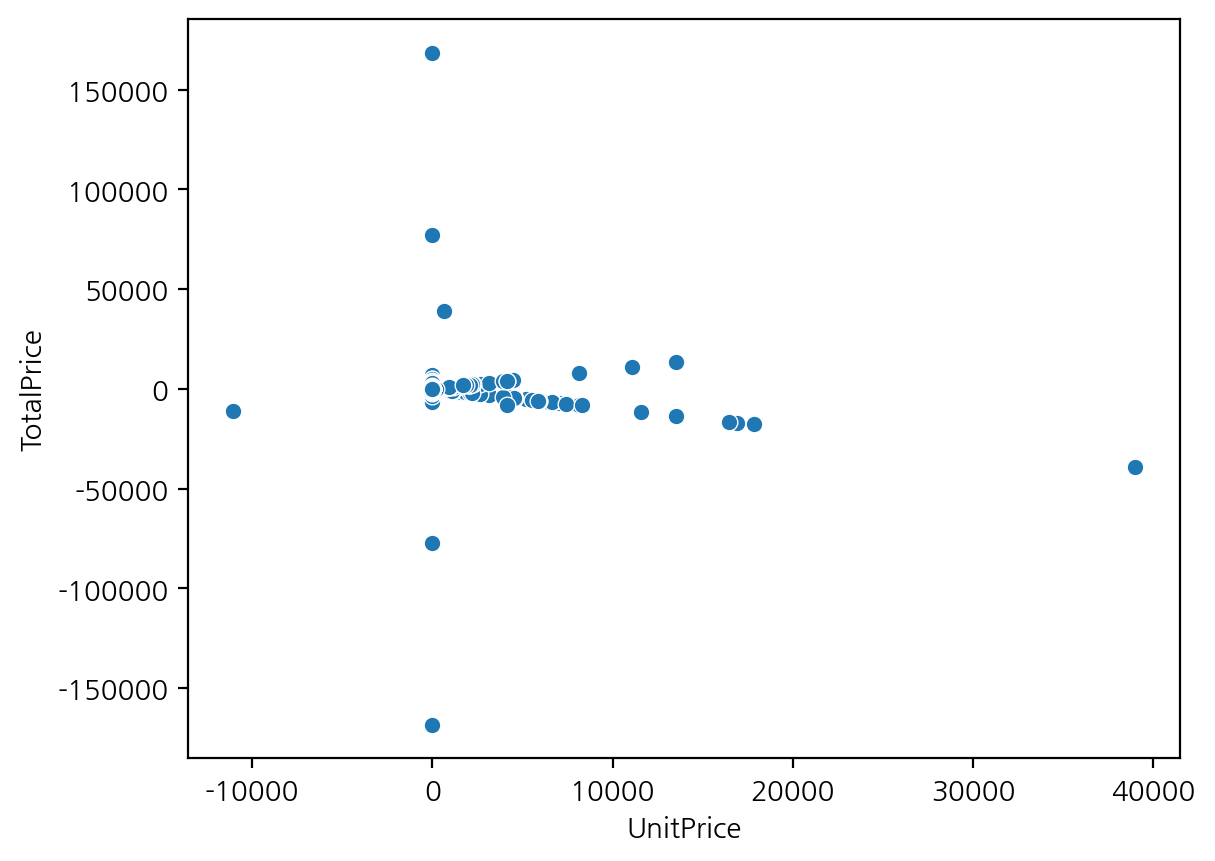

In [33]:
sns.scatterplot(x="UnitPrice", y="TotalPrice", data=df_5)

In [34]:
#음수 제거, 가격이기 때문에
df_5 = df_5.drop(df_5[df_5["UnitPrice"] < 0].index)
df_5 = df_5.drop(df_5[df_5["TotalPrice"] < 0].index)

In [35]:
#z점수 계산
from scipy import stats

z_scores = np.abs(stats.zscore(df_5))

In [36]:
#z점수 3 이상인 경우 제거
df_5.drop(df_5[(z_scores > 3).all(axis=1)].index, inplace=True)

In [37]:
df_5.describe()

,UnitPrice,TotalPrice
count,532536.000000,532536.000000
mean,3.597884,19.666124
std,10.963411,262.217811
min,0.000000,-0.000000
25%,1.250000,3.750000
50%,2.080000,9.900000
75%,4.130000,17.700000
max,822.940000,168469.600000


In [38]:
#안지워진것 확인- z스코어 드랍을 피한 이상치 2개는 그냥드랍하기
df_5['TotalPrice'].sort_values(ascending=False).head(5)

540421    168469.60
61619      77183.60
348325      7144.72
160546      6539.40
52711       6539.40
Name: TotalPrice, dtype: float64

In [39]:
df_5.drop(df_5[df_5["TotalPrice"] > 70000 ].index, inplace=True)

In [40]:
#단순회귀모델 적용하기
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

lr = LinearRegression()

X = df_5[["UnitPrice"]]
y = df_5["TotalPrice"]

#모델 구축
lr.fit(X, y)

#회귀계수
print("회귀계수:", lr.coef_)

#결정계수
print("결정계수:", lr.score(X, y))

회귀계수: [1.02852184]
결정계수: 0.029615547510121742


단가가 1증가할 때 총가격이 1.02 증가한다.

단가가 총가격의 변동을 3% 설명한다.

In [41]:
#유의성 해석
import statsmodels.api as sm

alpha = 0.05
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             TotalPrice   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                 1.625e+04
Date:                Tue, 16 Jul 2024   Prob (F-statistic):               0.00
Time:                        08:26:34   Log-Likelihood:            -2.9749e+06
No. Observations:              532534   AIC:                         5.950e+06
Df Residuals:                  532532   BIC:                         5.950e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.5044      0.093    166.550      0.0

단가의 증가가 총금액의 증가에 유의미한 영향을 미치지만 설명력이 낮다.

## 미션6) 여러 분은 크리스마스가 온라인 소매 판매에 미치는 영향을 평가하고, 이를 바탕으로 더 효과적인 가격 및 프로모션 전략을 개발해야 합니다.  

* 다음과 같은 비즈니스 전략을 고려하여 인과 분석을 합니다. 증거의 사다리로 데이터에서 얻을 수 있는 증거의 강도를 평가합니다. 크리스마스 관련 상품과 비관련 상품 간의 판매 차이를 분석합니다.


* 프로모션 전략
    * 크리스마스 상품 프로모션 강화하여 크리스마스 관련 상품의 판매를 증진시키기 위한 특별 프로모션을 개발합니다.
    * 대상 고객을 세분화하여 크리스마스 상품에 관심이 높은 고객 세그먼트를 식별하고, 이들을 대상으로 한 마케팅 캠페인을 실행합니다.
* 재고 및 공급망 관리
    * 재고 최적화를 통해 크리스마스 시즌에 대한 수요 예측을 바탕으로 재고 수준을 조절합니다.
    * 공급망 효율화를 통해 시즌별 수요 변화에 따라 공급망을 조정하여 비용을 최소화하고, 고객 만족도를 높입니다.
* 상품 다양화
    * 상품 포트폴리오를 확장하여 크리스마스 관련 상품뿐만 아니라, 다른 시즌 상품에도 주목하여 상품 포트폴리오를 다양화합니다

* 크리스마스 시즌 동안 프로모션과 상품 가격 전략이 판매에 미치는 영향을 분석하여, 미래의 프로모션 및 가격 전략을 최적화해야 합니다.



* 다음 주어진 코드를 활용합니다.


```python
# 2011년 이전 데이터만 사용합니다.
# 프로모션 여부와 시간에 따른 데이터 분리
df_promotion = df[(df["InvoiceDate"] < "2011-01-01") & df["Description"].notnull()].dropna().copy()
df_promotion["IsChristmasPeriod"] = (df_promotion["InvoiceDate"] >= "2010-12-17") & (df_promotion["InvoiceDate"] <= "2010-12-24")
df_promotion["IsChristmasProduct"] = df_promotion["Description"].str.lower().str.contains("christmas")
```

In [42]:
# 2011년 이전 데이터만 사용합니다.
# 프로모션 여부와 시간에 따른 데이터 분리
df_promotion = df[(df["InvoiceDate"] < "2011-01-01") & df["Description"].notnull()].dropna().copy()
df_promotion["IsChristmasPeriod"] = (df_promotion["InvoiceDate"] >= "2010-12-17") & (df_promotion["InvoiceDate"] <= "2010-12-24")
df_promotion["IsChristmasProduct"] = df_promotion["Description"].str.lower().str.contains("christmas")

In [43]:
df_promotion

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,TotalPrice,DayOfWeek,WeekEnd,IsChristmasPeriod,IsChristmasProduct
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,15.30,2,주중,False,False
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34,2,주중,False,False
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,22.00,2,주중,False,False
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34,2,주중,False,False
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34,2,주중,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42448,539988,84380,SET OF 3 BUTTERFLY COOKIE CUTTERS,1,2010-12-23 16:06:00,1.25,18116.0,United Kingdom,12,1.25,3,주중,True,False
42449,539988,84849D,HOT BATHS SOAP HOLDER,1,2010-12-23 16:06:00,1.69,18116.0,United Kingdom,12,1.69,3,주중,True,False
42450,539988,84849B,FAIRY SOAP SOAP HOLDER,1,2010-12-23 16:06:00,1.69,18116.0,United Kingdom,12,1.69,3,주중,True,False
42451,539988,22854,CREAM SWEETHEART EGG HOLDER,2,2010-12-23 16:06:00,4.95,18116.0,United Kingdom,12,9.90,3,주중,True,False


In [44]:
df_promotion.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID,InvoiceMonth,TotalPrice,DayOfWeek
count,26850.000000,26850,26850.000000,26850.000000,26850.0,26850.000000,26850.000000
mean,11.037691,2010-12-10 02:58:31.919553024,3.205109,15519.468750,12.0,20.655643,2.730354
min,-9360.000000,2010-12-01 08:26:00,0.000000,12347.000000,12.0,-1275.000000,0.000000
25%,1.000000,2010-12-05 13:18:00,1.250000,14159.000000,12.0,3.750000,1.000000
50%,4.000000,2010-12-09 12:17:00,2.100000,15555.000000,12.0,10.200000,3.000000
75%,12.000000,2010-12-14 13:32:00,3.750000,17126.000000,12.0,19.500000,4.000000
max,2880.000000,2010-12-23 16:06:00,295.000000,18269.000000,12.0,3828.000000,6.000000
std,73.225868,NaN,6.069806,1738.668579,0.0,77.166786,1.924511


In [45]:
#이상치 제거
df_promotion = df_promotion.drop(df_promotion[df_promotion["UnitPrice"] < 0].index)
df_promotion = df_promotion.drop(df_promotion[df_promotion["TotalPrice"] < 0].index)

In [46]:
#데이터 추출
df_6 = df_promotion.loc[:, ["UnitPrice", "TotalPrice", "IsChristmasPeriod", "IsChristmasProduct"]]
df_6.head()

,UnitPrice,TotalPrice,IsChristmasPeriod,IsChristmasProduct
0,2.55,15.30,False,False
1,3.39,20.34,False,False
2,2.75,22.00,False,False
3,3.39,20.34,False,False
4,3.39,20.34,False,False


<Axes: >

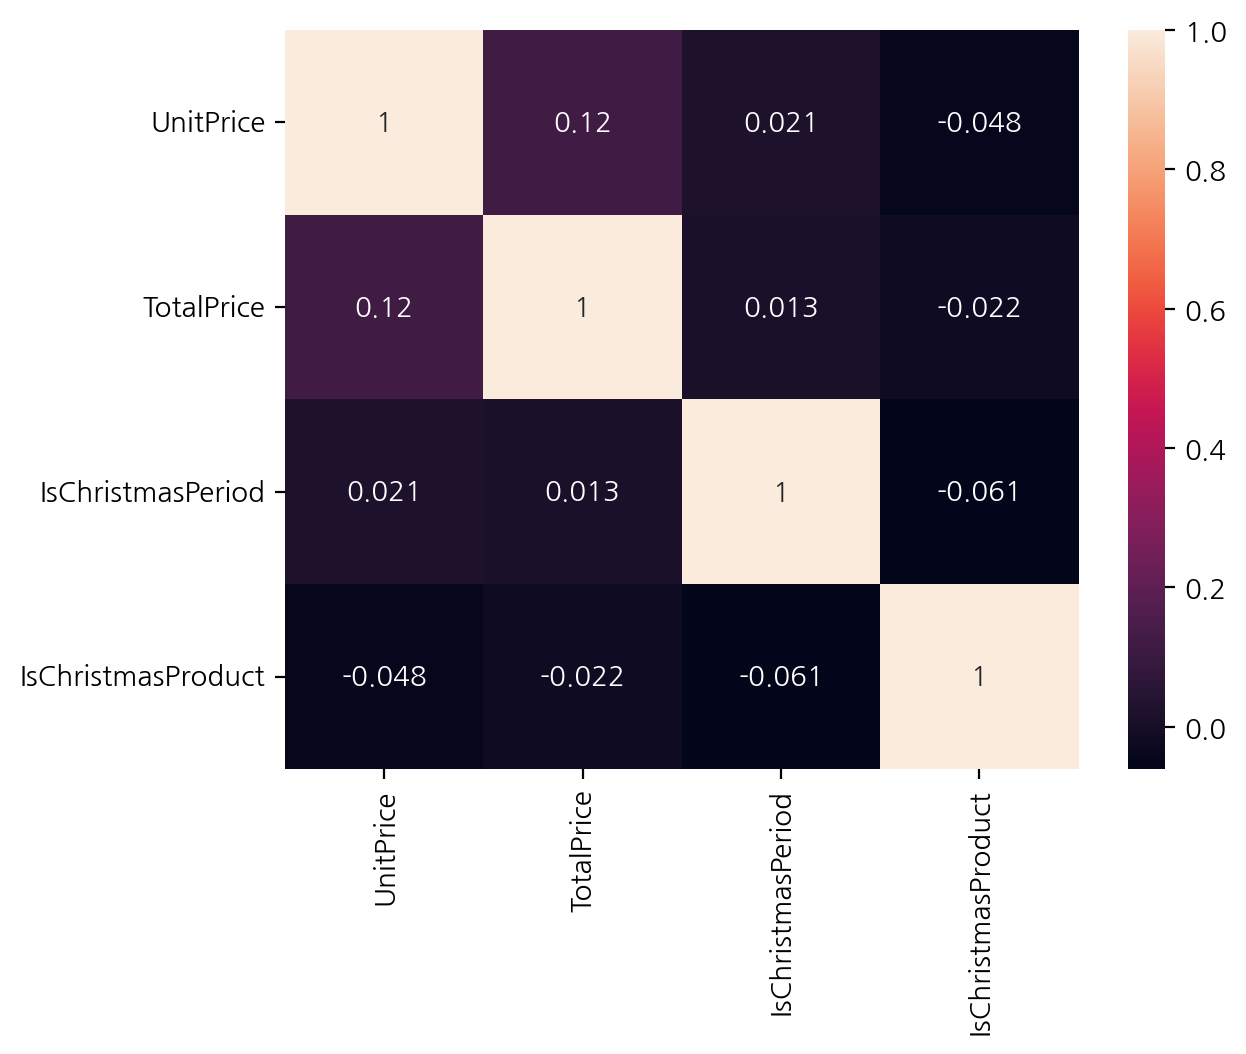

In [47]:
sns.heatmap(df_6.corr(), annot=True)

## 미션7) 다변량 회귀분석을 수행하여 크리스마스 기간 전후와 크리스마스 관련 상품과 비관련 상품 간의 판매량(Quantity) 차이를 'UnitPrice'와 'Country'와 함께 분석합니다.

* 판매량(Quantity)을 종속변수로 하여, 크리스마스 관련 상품 여부(IsChristmasProduct), 단가(UnitPrice), 국가(Country) 등을 독립변수로 포함하는 다변량 선형 회귀모델을 구축합니다.
* statsmodels 라이브러리(statsmodels.formula.api 의 ols)를 사용하여 모델을 구축하고, 결과를 해석합니다.
* 분석 결과를 해석하고, 이를 바탕으로 크리스마스 시즌 판매 전략에 대한 권장 사항을 제시합니다.
* 분석 과정과 결과, 그리고 비즈니스 전략에 대한 권장 사항을 포함하는 보고서를 작성합니다.
* 다음 주어진 코드를 활용합니다.

```python
from statsmodels.formula.api import ols

# ols.summary()를 이용해 볼 수 있습니다.
```

In [48]:
from statsmodels.formula.api import ols

# ols.summary()를 이용해 볼 수 있습니다.

In [49]:
df_7 = df_promotion.loc[:, ["Quantity", "Country", "UnitPrice", "IsChristmasProduct"]]
df_7.head()

,Quantity,Country,UnitPrice,IsChristmasProduct
0,6,United Kingdom,2.55,False
1,6,United Kingdom,3.39,False
2,8,United Kingdom,2.75,False
3,6,United Kingdom,3.39,False
4,6,United Kingdom,3.39,False


In [50]:
#영국1, 이외 0으로 만들기
df_7['Country'] = df_7['Country'].apply(lambda x: 1 if 'United Kingdom' in x else 0)

## 미션8) 온라인 소매 데이터를 사용하여 고객이 특정 상품을 구매할지 여부를 예측합니다.
이 예측 모델을 사용하여 타겟 마케팅 전략을 수립하고, 재고 관리를 최적화합니다. 고객의 특정 상품 구매 여부(구매/미구매)를 예측하는 이진 분류 모델을 구축합니다.


1) 타겟 변수 생성: 'WHITE HANGING HEART T-LIGHT HOLDER' 상품을 구매했는지 여부를 나타내는 이진 타겟 변수(0: 미구매, 1: 구매)를 생성합니다.\
2) 특성(feature) 선택: 구매 예측에 영향을 미칠 수 있는 변수들을 선택합니다. 예를 들어, 'UnitPrice', 'Quantity', 'CustomerID', 'Country' 등이 될 수 있습니다.\
3) 범주형 변수 처리: 'Country'와 같은 범주형 변수를 숫자로 변환합니다. 원-핫 인코딩 등을 사용할 수 있습니다.\
4) 데이터 분할: 모델 학습을 위해 데이터를 훈련 세트와 테스트 세트로 분할합니다.\
5) 로지스틱 회귀 모델 생성 및 학습합니다.\
6) 모델을 평가 합니다.

In [52]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,TotalPrice,DayOfWeek,WeekEnd
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,15.30,2,주중
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34,2,주중
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,22.00,2,주중
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34,2,주중
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34,2,주중
...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,12,10.20,4,주중
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12,12.60,4,주중
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,12,16.60,4,주중
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,12,16.60,4,주중


In [53]:
#피처 추출하기
df_8 = df.loc[:, ["Description", "UnitPrice", "Quantity", "CustomerID", "Country"]]
df_8.head()

,Description,UnitPrice,Quantity,CustomerID,Country
0,WHITE HANGING HEART T-LIGHT HOLDER,2.55,6,17850.0,United Kingdom
1,WHITE METAL LANTERN,3.39,6,17850.0,United Kingdom
2,CREAM CUPID HEARTS COAT HANGER,2.75,8,17850.0,United Kingdom
3,KNITTED UNION FLAG HOT WATER BOTTLE,3.39,6,17850.0,United Kingdom
4,RED WOOLLY HOTTIE WHITE HEART.,3.39,6,17850.0,United Kingdom


In [54]:
#Description 살펴보기
df_8["Description"].value_counts()

Description
WHITE HANGING HEART T-LIGHT HOLDER    2369
REGENCY CAKESTAND 3 TIER              2200
JUMBO BAG RED RETROSPOT               2159
PARTY BUNTING                         1727
LUNCH BAG RED RETROSPOT               1638
                                      ... 
FRYING PAN RED POLKADOT                  1
S/4 BLACK DISCO PARTITION PANEL          1
SCALLOP SHELL SOAP DISH                  1
FOUND                                    1
wrongly sold sets                        1
Name: count, Length: 4223, dtype: int64

In [55]:
#타겟값 1과 0 변환
df_8['Description'] = df_8['Description'].apply(lambda x: 1 if 'WHITE HANGING HEART T-LIGHT HOLDER' in x else 0)

In [56]:
#결측치는 0으로, 정수형으로 바꾸기
df_8 = df_8.fillna(0)
df_8['Description'].astype(int)

0         1
1         0
2         0
3         0
4         0
         ..
541904    0
541905    0
541906    0
541907    0
541908    0
Name: Description, Length: 541909, dtype: int64

In [57]:
df_8['Description'].astype(int)
df_8['Description'].value_counts()

Description
0.0    539540
1.0      2369
Name: count, dtype: int64

In [58]:
#고객번호 보기
df_8['CustomerID'].value_counts()

CustomerID
0.0        135080
17841.0      7983
14911.0      5903
14096.0      5128
12748.0      4642
            ...  
13270.0         1
17763.0         1
17291.0         1
15668.0         1
15562.0         1
Name: count, Length: 4373, dtype: int64

In [59]:
#비회원을 0으로, 회원을 1로 인코딩
df_8['CustomerID'] = df_8['CustomerID'].apply(lambda x: 0 if x==0.0 else 1)

In [60]:
df_8['CustomerID'].value_counts()

CustomerID
1    406829
0    135080
Name: count, dtype: int64

In [61]:
#국가별로 살펴보기
df_8['Country'].value_counts()

Country
United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58


In [62]:
#영국이 대다수를 차지하고 있어서 영국1, 외국0으로 인코딩
df_8['Country'] = df_8['Country'].apply(lambda x: 1 if 'United Kingdom' in x else 0)

In [63]:
df_8['Country'].value_counts()

Country
1    495478
0     46431
Name: count, dtype: int64

In [64]:
#수량으로 보기
df_8['Quantity'].value_counts()

Quantity
 1        148227
 2         81829
 12        61063
 6         40868
 4         38484
           ...  
-472           1
-161           1
-1206          1
-272           1
-80995         1
Name: count, Length: 722, dtype: int64

In [65]:
#0이하는 드랍
df_8.drop(df_8[df_8["Quantity"] <= 0].index , inplace=True)

In [66]:
df_8['Quantity'].value_counts()

Quantity
1        148227
2         81829
12        61063
6         40868
4         38484
          ...  
828           1
512           1
3100          1
291           1
80995         1
Name: count, Length: 393, dtype: int64

In [67]:
#0이하 단가 Drop
df_8.drop(df_8[df_8["UnitPrice"] <= 0].index , inplace=True)

In [68]:
df_8.describe()

,Description,UnitPrice,Quantity,CustomerID,Country
count,530104.000000,530104.000000,530104.000000,530104.000000,530104.000000
mean,0.004382,3.907625,10.542037,0.750577,0.915147
std,0.066053,35.915681,155.524124,0.432679,0.278663
min,0.000000,0.001000,1.000000,0.000000,0.000000
25%,0.000000,1.250000,1.000000,1.000000,1.000000
50%,0.000000,2.080000,3.000000,1.000000,1.000000
75%,0.000000,4.130000,10.000000,1.000000,1.000000
max,1.000000,13541.330000,80995.000000,1.000000,1.000000


In [74]:
#모델 만들기
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#독립변수와 종속변수 분리
X = df_8.drop('Description', axis=1)
y = df_8['Description']

#훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#로지스틱 회귀모델 학습
model = LogisticRegression()
model.fit(X_train, y_train)

#모델 예측
y_pred = model.predict(X_test)

In [70]:
#평가함수
def evaluate_model(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)

In [75]:
evaluate_model(y_test, y_pred) #모델 평가

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.9954348666773564
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


타겟값이 극단적으로 치우쳐서 일반적인 로지스틱 회귀로는 예측 불가능

In [76]:
#모델 수정시작
#다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor

def vif(df):
    vif = pd.DataFrame()
    vif["VIF Factor"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif["features"] = df.columns
    return vif

vif(X)
#다중공선성 없음

,VIF Factor,features
0,1.010667,UnitPrice
1,1.005244,Quantity
2,2.865914,CustomerID
3,2.874833,Country


In [79]:
#SMOTE 오버샘플링

from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [80]:
evaluate_model(y_test, y_pred)

Accuracy: 0.3350562624385735
Precision: 0.005578780859838427
Recall: 0.8161157024793388
F1 Score: 0.01108180900011222


In [94]:
#xgboost 시도
import xgboost as xgb

model = xgb.XGBClassifier(learning_rate=0.5)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [95]:
evaluate_model(y_test, y_pred)

Accuracy: 0.9300327293649371
Precision: 0.06013702106064451
Recall: 0.9793388429752066
F1 Score: 0.11331580205594072


In [ ]:
#데이터 전처리를 다시해야할것같다